In [1]:
#IPython notebook plot formatting
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

import matplotlib.pyplot as plt

#Load the modules
import Extractors as e
import Classifiers as c
import DoyleMLToolkit as dmlt

#Make sure they get reloaded after changes
e = reload(e)
c = reload(c)
dmlt = reload(dmlt)

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


3000


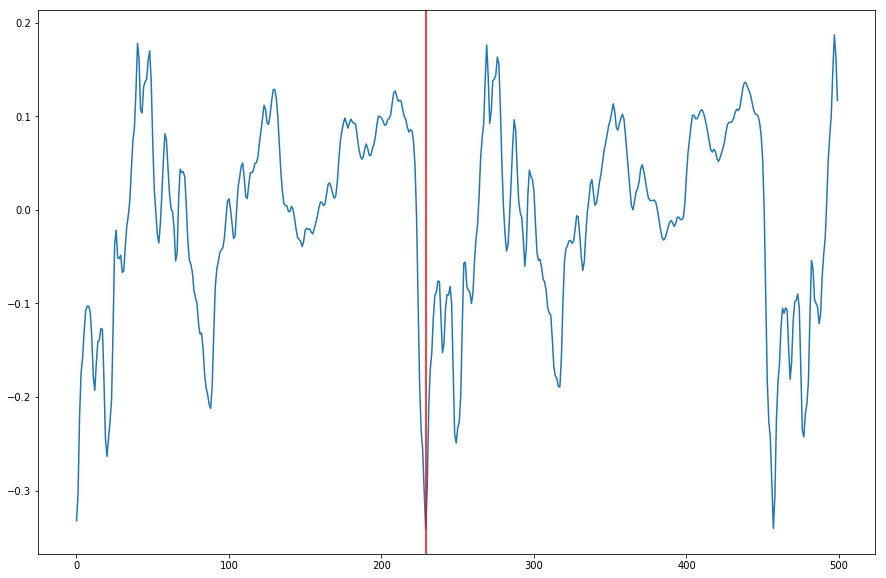

In [17]:
#Make models
order = 12
zeroth = 0
positive = "Trumpet1"
Models = []
for i in (c.All[:2]+[c.All[-1]]):
    for j in e.All:
        Models.append(dmlt.Model(j,i,order,zeroth))

#Load new raw sample
randomdata = file("/home/sean/voice.txt","r")
XX = [float(i.split()[1]) for i in randomdata.readlines()]
print len(XX)
randomdata.close()
samples = 2000
X = [[XX[j:263+j] for j in range(samples)]] #Each sample is of set length
y = [positive for i in range(len(X[0]))]

plt.plot(range(500),XX[:500])
plt.axvline(x=229.281147526,c='r')
plt.show()

In [3]:
#Load samples
'''data = ["14JulySound/trumpet1/Trumpet1Class.csv","14JulySound/trumpet1/E3.csv",
        "14JulySound/trumpet2/Trumpet2Class.csv","14JulySound/trumpet2/E3.csv",
       "14JulySound/flugel/FlugelClass.csv","14JulySound/flugel/E3.csv",
       "14JulySound/clarinet/ClarinetClass.csv","14JulySound/clarinet/E2.csv"]
SoundData = []
TestData = []
for model in Models:
    newModel = model.load(data[0],data[1])
    for i in range(2,len(data))[::2]:
        newModel += model.load(data[i],data[i+1])
    SoundData.append(newModel)
    TestData.append(model.load(y,X))
print list(set(SoundData[0].getAllY()))'''

SecondTest = []
for i in range(3,samples):
    SecondTest.append(Models[0].load([positive],[[XX[:i]]]))
ThirdTest = []
for i in range(3,samples):
    ThirdTest.append(Models[1].load([positive],[[XX[:i]]]))

In [4]:
#Generate variances
#The way these are arranged now is [model][parameter][order]
varReal = []
varImag = []
zeroth = 0
for model in SoundData:
    varReal.append(model.getVariances(0,0,zeroth))
    varImag.append(model.getVariances(1,0,zeroth))

#Replace each array with a set of tuples (index,value) of the n highest variances
n = 2
for model in range(len(varReal)):
    tmp1 = []
    tmp2 = []
    for i in range(n):
        tmp1.append(varReal[model].index(max(varReal[model])))
        varReal[model][tmp1[-1]] = -1

        tmp2.append(varImag[model].index(max(varImag[model])))
        varImag[model][tmp2[-1]] = -1
    varReal[model] = tmp1
    varImag[model] = tmp2
print varReal

[[0, 6], [4, 10], [0, 1], [0, 6], [4, 10], [0, 1], [0, 6], [4, 10], [0, 1]]


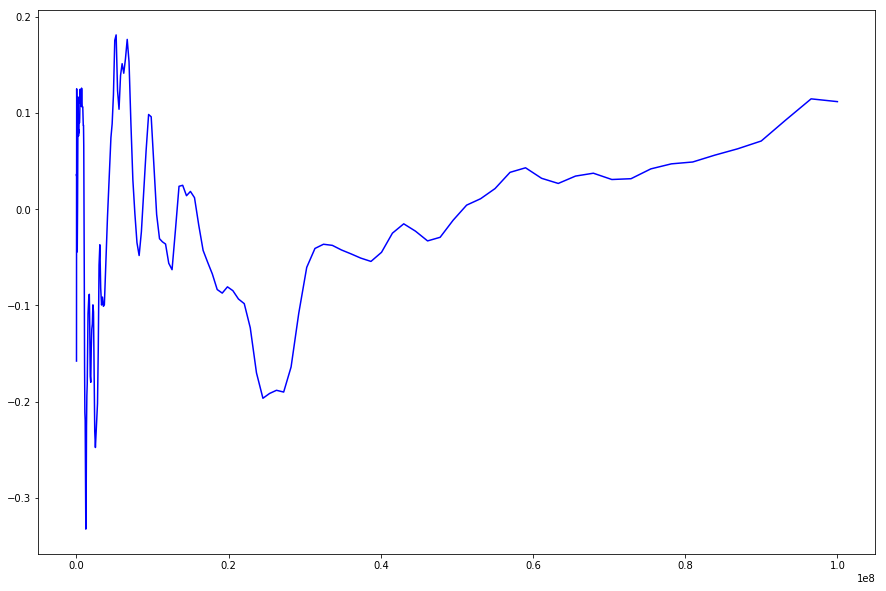

In [10]:
pylab.rcParams['figure.figsize'] = (15, 10)

model = 0
for i in range(SoundData[model].size):
    if SoundData[model].getAllY()[i] == positive:
        Models[model].plotSample(SoundData[model],i,'green')
        #Models[model].plotApproximation(SoundData[model],i,'r--',0,0)#,varReal[i])
    else:
        Models[model].plotSample(SoundData[model],i,'orange')
        #Models[model].plotApproximation(KidneyData[model],i,'b--',0,0)#,feats)
plt.show()

for i in range(TestData[model].size):
    if TestData[model].getAllY()[i] == positive:
        Models[model].plotSample(TestData[model],i,'blue',0)
        #Models[model].plotApproximation(KidneyData[model],i,'r--',imaginary,0)#,feats)
    else:
        Models[model].plotSample(TestData[model],i,'red',0)
plt.show()

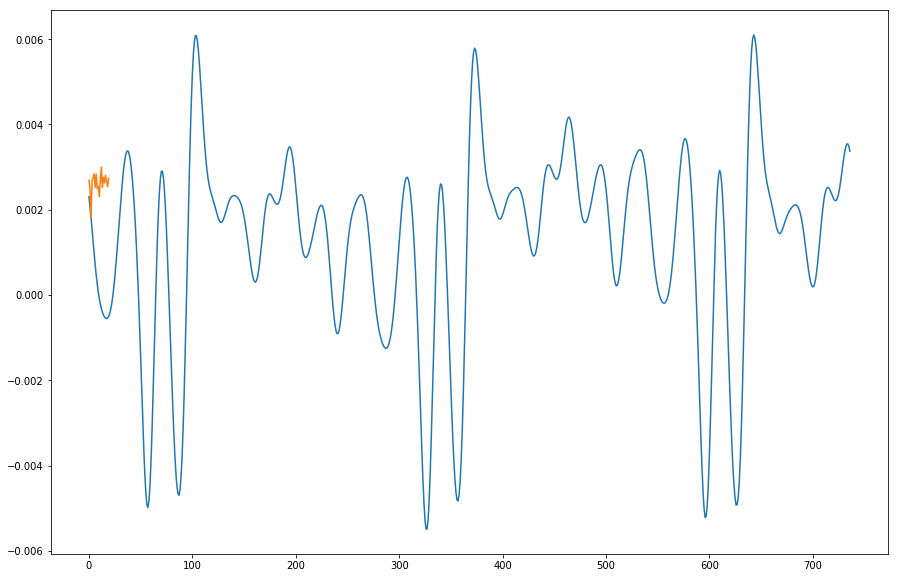

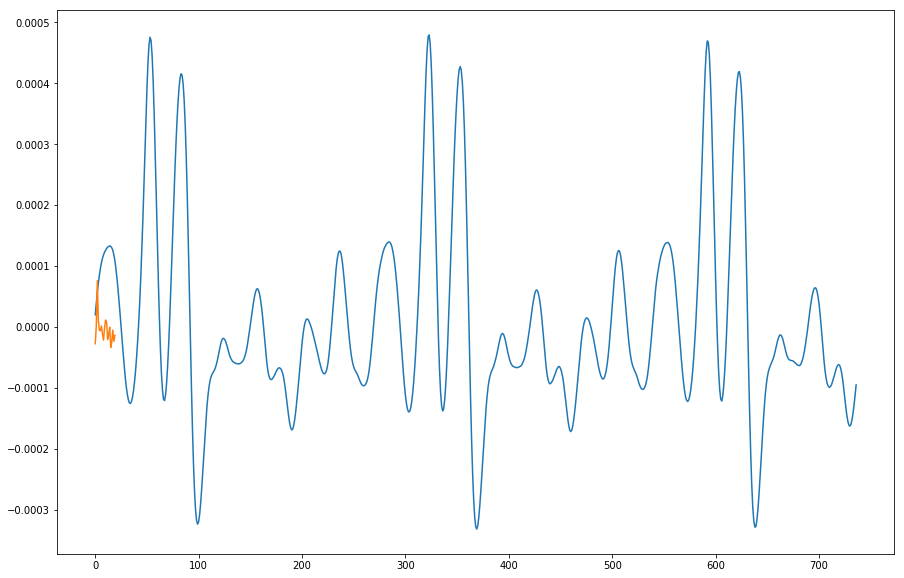

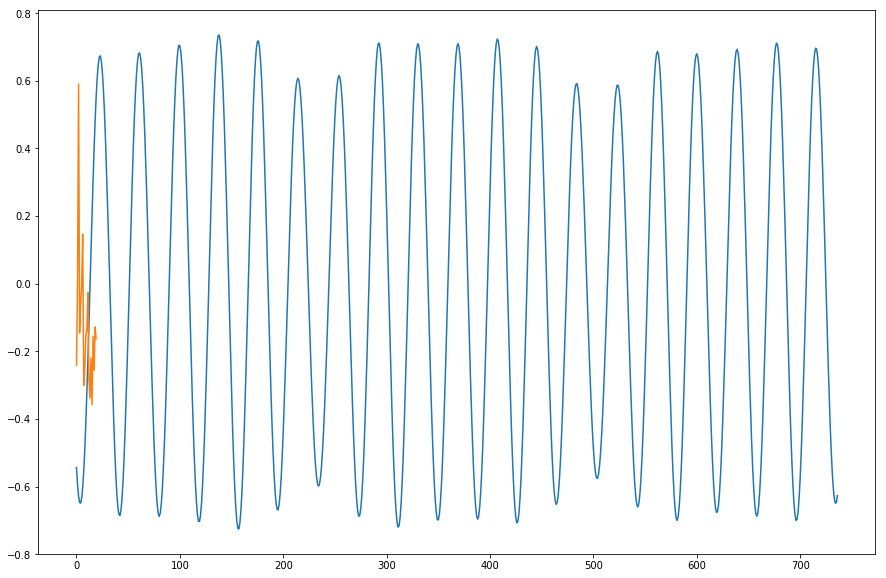

In [6]:
#Plot the most variant features of the test data

feature = 0
for model in range(len(Models))[:len(e.All)]:
    plt.plot(range(TestData[model].size),TestData[model].getFeaturesByOrder(feature))
    xxx = [SoundData[model].getFeaturesByOrder(feature)[i] for i in range(SoundData[model].size) if SoundData[model].getAllY()[i] == positive]
    plt.plot(range(len(xxx)),xxx)
    plt.show()

In [7]:
pylab.rcParams['figure.figsize'] = (10, 5)

#Test model

for model in range(len(Models)):
    Models[model].train(SoundData[model],[])
    print Models[model].C.name
    print Models[model].L.name
    #print feats
    Models[model].train(SoundData[model],[],varReal[model],0)
    #CancerModels[model].predict(KidneyData[model],KidneyData[model].getAllY())
    preds = Models[model].predict(TestData[model])
    for i in range(len(preds)):
        print i,preds[i]
    print ''

ComplexFourier
Naive Bayes Real
0 ('Flugel', 0.99999999619142876)
1 ('Flugel', 0.99999999985433163)
2 ('Flugel', 0.99999999997294964)
3 ('Flugel', 0.99999999996614974)
4 ('Flugel', 0.99999999967705477)
5 ('Flugel', 0.99999997907086891)
6 ('Flugel', 0.99999312966870202)
7 ('Flugel', 0.99258744934536802)
8 ('Clarinet', 0.94161662736924967)
9 ('Clarinet', 0.99997789312964824)
10 ('Clarinet', 0.99999999021622621)
11 ('Clarinet', 0.99999999985978749)
12 ('Clarinet', 0.99999999998967137)
13 ('Clarinet', 0.99999999999947065)
14 ('Clarinet', 0.99999999999998135)
15 ('Clarinet', 1.0)
16 ('Clarinet', 1.0)
17 ('Clarinet', 1.0)
18 ('Clarinet', 1.0)
19 ('Clarinet', 1.0)
20 ('Clarinet', 1.0)
21 ('Clarinet', 1.0)
22 ('Clarinet', 1.0)
23 ('Clarinet', 1.0)
24 ('Clarinet', 1.0)
25 ('Clarinet', 0.99999999999997335)
26 ('Clarinet', 0.99999999996232702)
27 ('Clarinet', 0.99999994042359397)
28 ('Clarinet', 0.99993637325891704)
29 ('Clarinet', 0.97242907883752805)
30 ('Trumpet2', 0.77940169712715857)
31 ('Tr

560 ('Clarinet', 1.0)
561 ('Clarinet', 1.0)
562 ('Clarinet', 1.0)
563 ('Clarinet', 0.99999999999998401)
564 ('Clarinet', 0.99999999999496403)
565 ('Clarinet', 0.99999999677100071)
566 ('Clarinet', 0.99999748710949354)
567 ('Clarinet', 0.99860906576710451)
568 ('Clarinet', 0.75297684944528309)
569 ('Trumpet2', 0.95568978229926593)
570 ('Trumpet2', 0.99675906650654245)
571 ('Trumpet2', 0.99889993965704782)
572 ('Trumpet2', 0.99850529428817758)
573 ('Trumpet2', 0.99439332926857349)
574 ('Trumpet2', 0.9649826982021148)
575 ('Trumpet2', 0.80991836009372387)
576 ('Trumpet2', 0.51364100235375232)
577 ('Clarinet', 0.62802582666542683)
578 ('Clarinet', 0.53179319662122992)
579 ('Trumpet2', 0.76992117954476291)
580 ('Trumpet2', 0.9623819092110304)
581 ('Trumpet2', 0.99600729592229109)
582 ('Trumpet2', 0.99935060325047465)
583 ('Trumpet2', 0.99781854474895837)
584 ('Trumpet2', 0.96979736337160871)
585 ('Trumpet2', 0.850211578588151)
586 ('Clarinet', 0.99625750810018177)
587 ('Clarinet', 0.9999999

559 ('Clarinet', 1.0)
560 ('Clarinet', 1.0)
561 ('Clarinet', 1.0)
562 ('Clarinet', 0.99999999999999956)
563 ('Clarinet', 0.9999999999936342)
564 ('Clarinet', 0.99999997004245689)
565 ('Clarinet', 0.99995171540016181)
566 ('Clarinet', 0.9821814625035763)
567 ('Trumpet2', 0.5476656825753764)
568 ('Trumpet2', 0.94426712561016757)
569 ('Trumpet2', 0.98348725756181643)
570 ('Trumpet2', 0.98770336462483654)
571 ('Trumpet2', 0.98482683333225163)
572 ('Trumpet2', 0.97706845778269336)
573 ('Trumpet2', 0.96395881305590958)
574 ('Trumpet2', 0.94439417715210261)
575 ('Trumpet2', 0.91477558414738036)
576 ('Trumpet2', 0.86238807812950202)
577 ('Trumpet2', 0.76728544476911531)
578 ('Trumpet2', 0.63862722079410406)
579 ('Trumpet2', 0.51877902645587592)
580 ('Clarinet', 0.54913862471276387)
581 ('Clarinet', 0.52880405493103466)
582 ('Trumpet2', 0.57618408618186212)
583 ('Trumpet2', 0.71809136048473343)
584 ('Trumpet2', 0.86383018174230508)
585 ('Trumpet2', 0.95432644098321229)
586 ('Trumpet2', 0.985349

408 ('Clarinet', 1.0)
409 ('Clarinet', 1.0)
410 ('Clarinet', 1.0)
411 ('Clarinet', 0.99999999999998845)
412 ('Clarinet', 0.99999997391049733)
413 ('Clarinet', 0.99998781757612576)
414 ('Clarinet', 0.99995951805682493)
415 ('Clarinet', 0.9999735293689731)
416 ('Clarinet', 0.99995072333661927)
417 ('Clarinet', 0.99865128631519418)
418 ('Clarinet', 0.55016770305641149)
419 ('Flugel', 0.99977574111117051)
420 ('Flugel', 0.99999996294013704)
421 ('Flugel', 0.99999999988600874)
422 ('Flugel', 0.99999999976549181)
423 ('Flugel', 0.99998766381292659)
424 ('Clarinet', 0.99999758339620792)
425 ('Clarinet', 1.0)
426 ('Clarinet', 1.0)
427 ('Clarinet', 0.99999999997546496)
428 ('Clarinet', 0.98261967313622878)
429 ('Trumpet2', 0.99999104484641943)
430 ('Trumpet2', 0.9999999998669562)
431 ('Trumpet2', 0.99999999999988987)
432 ('Trumpet2', 0.99999999999999756)
433 ('Trumpet2', 0.99999999999999933)
434 ('Trumpet2', 0.99999999999999933)
435 ('Trumpet2', 0.999999999999998)
436 ('Trumpet2', 0.99999999999

358 ('Trumpet1', 0.43203796441691111)
359 ('Trumpet1', 0.47930220152602165)
360 ('Trumpet1', 0.46927449958162432)
361 ('Trumpet1', 0.41439425158696619)
362 ('Trumpet1', 0.33830535860178651)
363 ('Trumpet2', 0.30090333972194383)
364 ('Trumpet2', 0.29266403657618489)
365 ('Trumpet2', 0.29137099208117884)
366 ('Trumpet2', 0.29826034555543279)
367 ('Trumpet1', 0.31882895679894324)
368 ('Trumpet1', 0.3977263500665254)
369 ('Trumpet1', 0.46197079847248346)
370 ('Trumpet1', 0.48103218700558881)
371 ('Trumpet1', 0.43608944065962851)
372 ('Trumpet2', 0.3661928601649701)
373 ('Clarinet', 0.43127600444223124)
374 ('Clarinet', 0.56724019769106782)
375 ('Clarinet', 0.68785948930310481)
376 ('Clarinet', 0.78447272277913216)
377 ('Clarinet', 0.85615237789614673)
378 ('Clarinet', 0.90442109973763063)
379 ('Clarinet', 0.93418776099476153)
380 ('Clarinet', 0.95123751367647658)
381 ('Clarinet', 0.96000615316692872)
382 ('Clarinet', 0.96308363065030034)
383 ('Clarinet', 0.96148225812703081)
384 ('Clarinet

329 ('Clarinet', nan)
330 ('Clarinet', nan)
331 ('Clarinet', nan)
332 ('Clarinet', nan)
333 ('Clarinet', nan)
334 ('Clarinet', nan)
335 ('Clarinet', nan)
336 ('Clarinet', nan)
337 ('Clarinet', nan)
338 ('Clarinet', nan)
339 ('Clarinet', nan)
340 ('Clarinet', nan)
341 ('Clarinet', nan)
342 ('Clarinet', nan)
343 ('Clarinet', nan)
344 ('Clarinet', nan)
345 ('Clarinet', nan)
346 ('Clarinet', nan)
347 ('Clarinet', nan)
348 ('Clarinet', nan)
349 ('Clarinet', nan)
350 ('Clarinet', nan)
351 ('Clarinet', nan)
352 ('Clarinet', nan)
353 ('Clarinet', nan)
354 ('Clarinet', nan)
355 ('Clarinet', nan)
356 ('Clarinet', nan)
357 ('Clarinet', nan)
358 ('Clarinet', nan)
359 ('Clarinet', nan)
360 ('Clarinet', nan)
361 ('Clarinet', nan)
362 ('Clarinet', nan)
363 ('Clarinet', nan)
364 ('Clarinet', nan)
365 ('Clarinet', nan)
366 ('Clarinet', nan)
367 ('Clarinet', nan)
368 ('Clarinet', nan)
369 ('Clarinet', nan)
370 ('Clarinet', nan)
371 ('Clarinet', nan)
372 ('Clarinet', nan)
373 ('Clarinet', nan)
374 ('Clar

436 ('Clarinet', nan)
437 ('Clarinet', nan)
438 ('Clarinet', nan)
439 ('Clarinet', nan)
440 ('Clarinet', nan)
441 ('Clarinet', nan)
442 ('Clarinet', nan)
443 ('Clarinet', nan)
444 ('Clarinet', nan)
445 ('Clarinet', nan)
446 ('Clarinet', nan)
447 ('Clarinet', nan)
448 ('Clarinet', nan)
449 ('Clarinet', nan)
450 ('Clarinet', nan)
451 ('Clarinet', nan)
452 ('Clarinet', nan)
453 ('Clarinet', nan)
454 ('Clarinet', nan)
455 ('Clarinet', nan)
456 ('Clarinet', nan)
457 ('Clarinet', nan)
458 ('Clarinet', nan)
459 ('Clarinet', nan)
460 ('Clarinet', nan)
461 ('Clarinet', nan)
462 ('Clarinet', nan)
463 ('Clarinet', nan)
464 ('Clarinet', nan)
465 ('Clarinet', nan)
466 ('Clarinet', nan)
467 ('Clarinet', nan)
468 ('Clarinet', nan)
469 ('Clarinet', nan)
470 ('Clarinet', nan)
471 ('Clarinet', nan)
472 ('Clarinet', nan)
473 ('Clarinet', nan)
474 ('Clarinet', nan)
475 ('Clarinet', nan)
476 ('Clarinet', nan)
477 ('Clarinet', nan)
478 ('Clarinet', nan)
479 ('Clarinet', nan)
480 ('Clarinet', nan)
481 ('Clar

428 ('Clarinet', 1.0)
429 ('Clarinet', 1.0)
430 ('Clarinet', 1.0)
431 ('Clarinet', 1.0)
432 ('Clarinet', 1.0)
433 ('Clarinet', 1.0)
434 ('Clarinet', 1.0)
435 ('Clarinet', 1.0)
436 ('Clarinet', 1.0)
437 ('Clarinet', 1.0)
438 ('Clarinet', 1.0)
439 ('Clarinet', 1.0)
440 ('Clarinet', 1.0)
441 ('Clarinet', 1.0)
442 ('Clarinet', 1.0)
443 ('Clarinet', 1.0)
444 ('Trumpet2', 0.66666666666666663)
445 ('Trumpet2', 1.0)
446 ('Trumpet2', 1.0)
447 ('Trumpet2', 1.0)
448 ('Flugel', 1.0)
449 ('Flugel', 1.0)
450 ('Flugel', 1.0)
451 ('Flugel', 1.0)
452 ('Flugel', 1.0)
453 ('Flugel', 1.0)
454 ('Flugel', 1.0)
455 ('Flugel', 1.0)
456 ('Flugel', 1.0)
457 ('Flugel', 1.0)
458 ('Flugel', 1.0)
459 ('Flugel', 1.0)
460 ('Flugel', 1.0)
461 ('Flugel', 1.0)
462 ('Flugel', 1.0)
463 ('Flugel', 1.0)
464 ('Flugel', 1.0)
465 ('Flugel', 1.0)
466 ('Flugel', 1.0)
467 ('Trumpet2', 1.0)
468 ('Trumpet2', 1.0)
469 ('Trumpet2', 1.0)
470 ('Clarinet', 1.0)
471 ('Clarinet', 1.0)
472 ('Clarinet', 1.0)
473 ('Clarinet', 1.0)
474 ('Clar

474 ('Flugel', 1.0)
475 ('Flugel', 1.0)
476 ('Flugel', 1.0)
477 ('Flugel', 1.0)
478 ('Flugel', 1.0)
479 ('Flugel', 0.66666666666666663)
480 ('Trumpet2', 0.66666666666666663)
481 ('Trumpet2', 1.0)
482 ('Trumpet2', 1.0)
483 ('Trumpet2', 1.0)
484 ('Trumpet2', 1.0)
485 ('Trumpet2', 1.0)
486 ('Trumpet2', 1.0)
487 ('Trumpet2', 1.0)
488 ('Trumpet2', 1.0)
489 ('Trumpet2', 1.0)
490 ('Trumpet2', 1.0)
491 ('Trumpet2', 1.0)
492 ('Trumpet2', 1.0)
493 ('Trumpet2', 1.0)
494 ('Trumpet2', 1.0)
495 ('Clarinet', 0.66666666666666663)
496 ('Clarinet', 1.0)
497 ('Clarinet', 1.0)
498 ('Clarinet', 1.0)
499 ('Clarinet', 1.0)
500 ('Clarinet', 0.66666666666666663)
501 ('Trumpet1', 1.0)
502 ('Trumpet1', 1.0)
503 ('Trumpet1', 1.0)
504 ('Trumpet1', 1.0)
505 ('Trumpet1', 1.0)
506 ('Trumpet1', 1.0)
507 ('Trumpet1', 1.0)
508 ('Trumpet1', 1.0)
509 ('Trumpet1', 1.0)
510 ('Clarinet', 1.0)
511 ('Clarinet', 1.0)
512 ('Clarinet', 1.0)
513 ('Clarinet', 1.0)
514 ('Trumpet2', 1.0)
515 ('Trumpet2', 1.0)
516 ('Trumpet2', 1.0)
51

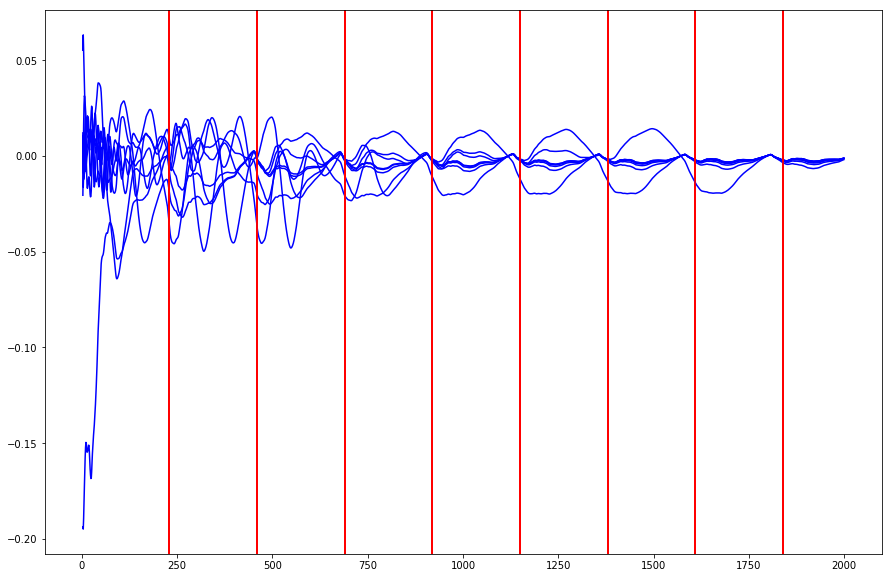

In [6]:
#Plot the most variant features of the test data

X_ = []
Y_ = []

o = 8
for feature in range(o):
    yy = [i.getFeaturesBySweep(0,0,0)[feature] for i in SecondTest]
    #dyy = [yy[i]-yy[i-1] for i in range(1,len(yy))]
    #ddyy = [dyy[i]-dyy[i-1] for i in range(1,len(dyy))]

    plt.plot(range(3,samples),yy,'b')
    plt.axvline(x=230,c='r')
    plt.axvline(x=230*2,c='r')
    plt.axvline(x=230*3,c='r')
    plt.axvline(x=230*4,c='r')
    plt.axvline(x=230*5,c='r')
    plt.axvline(x=230*6,c='r')
    plt.axvline(x=230*7,c='r')
    plt.axvline(x=230*8,c='r')
    #plt.show()
    
    #plt.plot([i-0.5 for i in range(4,samples)],dyy,'g')
    #plt.plot([0,samples],[0,0],'y')
    #plt.axvline(x=263,c='r')
    #plt.axvline(x=263*2,c='r')
    #plt.show()

    '''plt.plot([i for i in range(4,samples-1)],ddyy,'y')
    plt.plot([0,samples],[0,0],'purple')
    plt.axvline(x=263,c='r')
    plt.axvline(x=263*2,c='r')
    plt.show()'''
    
    '''for i in range(1,len(dyy)):
        if dyy[i]*dyy[i-1] < 0:
            plt.axvline(x=(i - dyy[i]/(dyy[i]-dyy[i-1])),c='g')
    for i in range(1,len(ddyy)):
        if ddyy[i]*ddyy[i-1] < 0:
            plt.plot([0,samples],[(i - ddyy[i]/(ddyy[i]-ddyy[i-1])),(i - ddyy[i]/(ddyy[i]-ddyy[i-1]))],'b')
    plt.show()'''
    
    for j in range(feature+1,o):
        zz = [i.getFeaturesBySweep(0,0,0)[j] for i in SecondTest]
        for k in range(1,len(zz)):
            inf = (zz[k]-yy[k])*(zz[k-1]-yy[k-1])
            if inf < 0:
                x_ = ((yy[k]-yy[k-1]+zz[k]-zz[k-1])*k-yy[k]+zz[k])/(yy[k]-yy[k-1]+zz[k]-zz[k-1])
                if x_ > 0:
                    y_ = (yy[k]-yy[k-1])*(x_-k)+yy[k]
                    X_.append(x_)
                    Y_.append(y_)
                    #plt.plot([x_],[y_],'ro')

plt.show()

[303.83713583301096, 229.9430492304802, 228.2643663303945, 220.91726325005948, 222.54517659735657, 220.62335988266247, 215.74002685634167, 215.761398872035, 205.89855087973677]
229.281147526


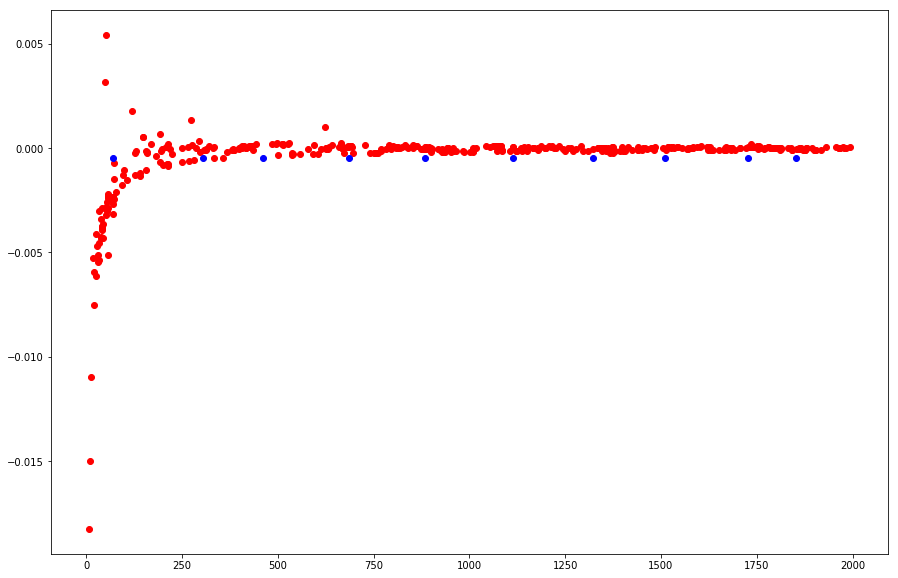

In [11]:
mX = [100,300,500,700,900,1100,1300,1500,1700,1900]
mY = [0 for i in mX]
r = 100
pmX = []
pmY = []
while pmX != mX and pmY != mY:
    pmX = mX[:]
    pmY = mY[:]
    for i in range(len(mX)):
        avgsX = [0,0]
        avgsY = [0,0]
        for j in range(len(X_)):
            if X_[j] > mX[i]-r and X_[j] < mX[i]+r:
                avgsX[0] += X_[j]
                avgsX[1] += 1
        for j in range(len(Y_)):
            if Y_[j] > mY[i]-r and Y_[j] < mY[i]+r:
                avgsY[0] += Y_[j]
                avgsY[1] += 1
        avgsX[0] /= avgsX[1]
        mX[i] = avgsX[0]
        avgsY[0] /= avgsY[1]
        mY[i] = avgsY[0]

for i in range(len(X_)):
    plt.plot([X_[i]],[Y_[i]],'ro')
for i in range(len(mX)):
    plt.plot([mX[i]],[mY[i]],'bo')
avgs = [mX[i]/i for i in range(1,len(mX))]
print avgs
print sum(avgs)/len(avgs)

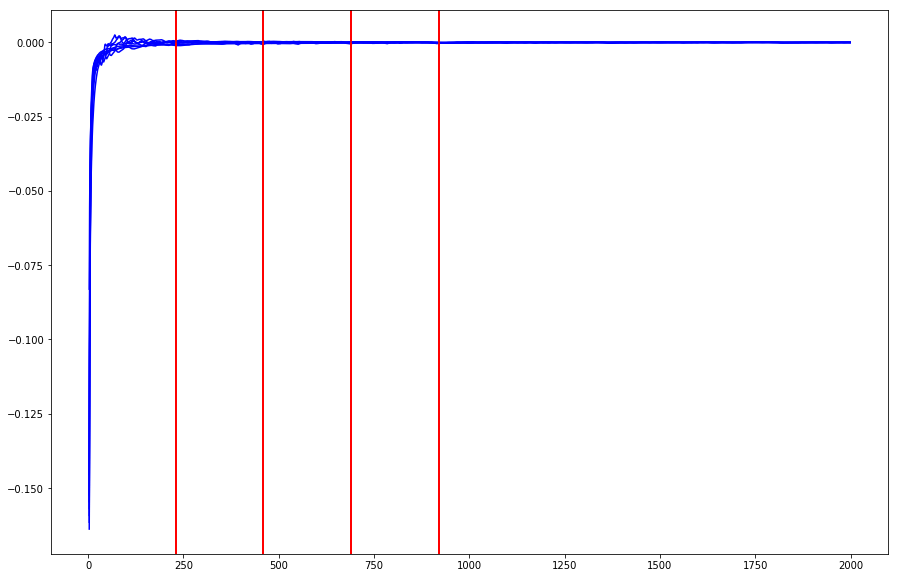

In [13]:
#Plot the most variant features of the test data

X_ = []
Y_ = []

o = 8
for feature in range(o):
    yy = [i.getFeaturesBySweep(0,0,0)[feature] for i in ThirdTest]

    plt.plot(range(3,samples),yy,'b')
    plt.axvline(x=230,c='r')
    plt.axvline(x=230*2,c='r')
    plt.axvline(x=230*3,c='r')
    plt.axvline(x=230*4,c='r')
    
    for j in range(feature+1,o):
        zz = [i.getFeaturesBySweep(0,0,0)[j] for i in ThirdTest]
        for k in range(1,len(zz)):
            inf = (zz[k]-yy[k])*(zz[k-1]-yy[k-1])
            if inf < 0:
                x_ = ((yy[k]-yy[k-1]+zz[k]-zz[k-1])*k-yy[k]+zz[k])/(yy[k]-yy[k-1]+zz[k]-zz[k-1])
                if x_ > 0:
                    y_ = (yy[k]-yy[k-1])*(x_-k)+yy[k]
                    X_.append(x_)
                    Y_.append(y_)
                    #plt.plot([x_],[y_],'ro')

plt.show()

[297.04563319028483, 251.81150072184724, 229.0584645382099, 223.89142243405826]
250.451755221


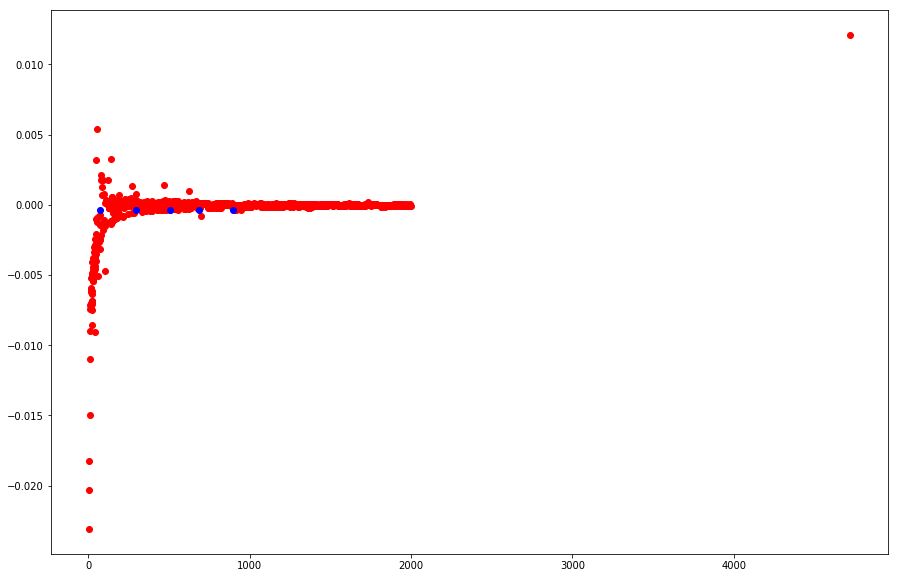

In [14]:
mX = [100,300,500,700,900]
mY = [0,0,0,0,0]
r = 100
pmX = []
pmY = []
while pmX != mX and pmY != mY:
    pmX = mX[:]
    pmY = mY[:]
    for i in range(len(mX)):
        avgsX = [0,0]
        avgsY = [0,0]
        for j in range(len(X_)):
            if X_[j] > mX[i]-r and X_[j] < mX[i]+r:
                avgsX[0] += X_[j]
                avgsX[1] += 1
        for j in range(len(Y_)):
            if Y_[j] > mY[i]-r and Y_[j] < mY[i]+r:
                avgsY[0] += Y_[j]
                avgsY[1] += 1
        avgsX[0] /= avgsX[1]
        mX[i] = avgsX[0]
        avgsY[0] /= avgsY[1]
        mY[i] = avgsY[0]

for i in range(len(X_)):
    plt.plot([X_[i]],[Y_[i]],'ro')
for i in range(len(mX)):
    plt.plot([mX[i]],[mY[i]],'bo')
avgs = [mX[i]/i for i in range(1,len(mX))]
print avgs
print sum(avgs)/len(avgs)